# Clustering de documents

## Imports

In [162]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import yake

In [163]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [164]:
data_path = "../../data/txt/"

## Choisir une décennie

In [165]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [166]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [167]:
# Exemple de fichiers
files[:700]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt',
 'KB_JB838_1960-01-27_01-00006.txt',
 'KB_JB838_1960-01-28_01-00011.txt',
 'KB_JB838_1960-01-28_01-00021.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-01-31_01-00024.txt',
 'KB_JB838_1960-02-03_01-00019.txt',
 'KB_JB838_1960-02-13_01-00020.txt',
 'KB_JB838_1960-02-19_01-00011.txt',
 'KB_JB838_1960-02-20_01-00006.txt',
 'KB_JB838_1960-02-24_01-00020.txt',
 'KB_JB838_1960-02-26_01-00001.txt',
 'KB_JB838_1960-02-26_01-00011.txt',
 'KB_JB838_1960-03-04_01-00010.txt',
 'KB_JB838_1960-03-06_01-00004.txt',
 'KB_JB838_1960-03-08_01-00008.txt',
 'KB_JB838_1960-03-09_01-00001.txt',
 'KB_JB838_1960-03-11_01-00020.txt',
 'KB_JB838_1960-03-11_01-00022.txt',
 'KB_JB838_1960-03-12_01-00007.txt',
 'KB_JB838_1960-03-13_01-00009.txt',
 'KB_JB838_1960-03-16_01-00007.txt',
 'KB_JB838_1960-03-18_01-00009.txt',
 

In [168]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [169]:
# Exemple de textes
texts[0][:500]

'ia« le som ÏJsIne MéuhMrïiqii S.AT\'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit 130221H PORTANTE 80C.BRUXELL0I8I cherche pour entrée Immédiate Secrétaire Sténo-Dactylo 3 françalee - 1 an d\'expérience, al tuât h «table - semaine de 5 Jours. Ecrire é cur. vit et prêt Ag. Rossel 02983 H "âociËTS\'Importante de sa pi* demande 1 Sténo-Dactylo bilingue débutante. - Se présenter : 151.'

## Vectoriser les documents à l'aide de TF-IDF

In [170]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [171]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\acer\Desktop\tac\tac\.env\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Imprimer le vecteur tf-IDF du premier document

In [172]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429849
ecrire        0.290763
agence        0.287302
bilingue      0.195620
importante    0.172368
                ...   
envoyé        0.000000
er            0.000000
erreurs       0.000000
esp           0.000000
♦             0.000000
Length: 2998, dtype: float64

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [173]:
N_CLUSTERS = 2

### Instancier le modèle K-Means et ses arguments

In [174]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [175]:
clusters = km_model.fit_predict(tfidf_vectors)

In [176]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [177]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-10_01-00018.txt',
     'KB_JB838_1960-01-21_01-00014.txt',
     'KB_JB838_1960-01-22_01-00015.txt',
     'KB_JB838_1960-02-03_01-00019.txt',
     'KB_JB838_1960-02-13_01-00020.txt',
     'KB_JB838_1960-02-24_01-00020.txt',
     'KB_JB838_1960-03-11_01-00020.txt',
     'KB_JB838_1960-03-11_01-00022.txt',
     'KB_JB838_1960-03-25_01-00020.txt',
     'KB_JB838_1960-03-29_01-00018.txt',
     'KB_JB838_1960-04-01_01-00020.txt',
     'KB_JB838_1960-04-01_01-00022.txt',
     'KB_JB838_1960-04-02_01-00017.txt',
     'KB_JB838_1960-04-05_01-00016.txt',
     'KB_JB838_1960-04-13_01-00017.txt',
     'KB_JB838_1960-04-14_01-00016.txt',
     'KB_JB838_1960-04-20_01-00016.txt',
     'KB_JB838_1960-04-30_01-00016.txt',
     'KB_JB838_1960-05-28_01-00021.txt',
     'KB_JB838_1960-07-06_01-00020.txt',
     'KB_JB838_1960-07-14_01-00015.txt',
     'KB_JB838_1960-08-04_01-00018.txt',
     'KB_JB838_1960-08-13_01-00016.txt',
     'KB_JB838_1960-08-25_01-00021.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [178]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [179]:
reduced_vectors[:300]

array([[ 4.99251603e-01, -4.39417574e-01],
       [-2.28873383e-01,  1.37502952e-03],
       [-2.79290129e-01, -1.57117754e-02],
       [ 2.86232758e-01,  5.16791840e-01],
       [ 3.06998602e-01,  5.18683535e-01],
       [-2.89694656e-01, -9.04749166e-02],
       [-4.74447137e-02,  4.05318239e-02],
       [-6.06392478e-02,  1.19800534e-01],
       [-2.23477242e-01, -5.22471961e-02],
       [-1.21660657e-01,  7.45922792e-02],
       [ 4.54596336e-01, -2.75482494e-01],
       [ 5.23277120e-01, -3.54894051e-01],
       [-3.13694034e-01, -6.54141579e-02],
       [-2.42584492e-01, -4.77812329e-02],
       [ 1.26079713e-02,  1.87502707e-01],
       [-2.62486844e-01, -6.12239455e-02],
       [-1.58116324e-01,  3.68334050e-02],
       [-2.91138044e-01, -3.11628600e-02],
       [-2.58402659e-01, -5.45189993e-02],
       [-3.21351605e-01, -7.87167370e-02],
       [-2.70690829e-01, -7.98989837e-02],
       [ 5.38797624e-01, -3.51130210e-01],
       [ 3.15952240e-01,  2.04489413e-01],
       [-2.

### Générer le plot

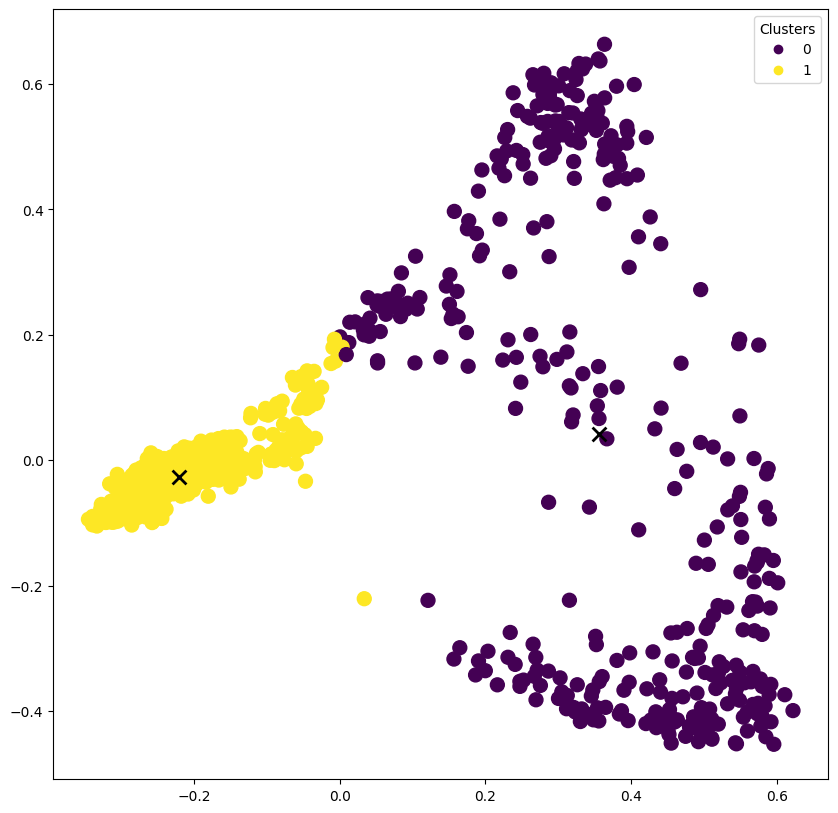

In [180]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")